In [1]:
# 测试反向求导功能
from core import *
import numpy as np

In [2]:
a = Tensor.from_numpy(np.array([[1, 2]], dtype=np.float32),dtype="float32")
b = Tensor.from_numpy(np.array([[3, 4]], dtype=np.float32),dtype="float32")

c = a + b

d = Tensor.from_numpy(numpy_array=np.array([[2],[3]], dtype=np.float32),dtype="float32")

e = c @ d

f = Tensor.make_const(np.array([1, 1], dtype=np.float32))

In [3]:
y = f + e

In [4]:
y.backward()

In [5]:
e.grad.data

array([[1., 1.]])

In [32]:

a = Tensor.from_numpy(np.array([[1], [2],[3], [4], [5], [6], [7], [8], [9], [10]], dtype=np.float32),dtype="float32")
b = np.ones((10), dtype=np.float32)

In [33]:
c = a - b

In [35]:
c.shape

(10, 10)

In [6]:
from DataTools import *

iris_dataset = DataSet(data_path='iris.csv', data_type='csv')

In [7]:
iris_loader = DataLoader(iris_dataset, batch_size=8, shuffle=True)

In [8]:
for data, labels in iris_loader:
    print(f"data: \n {data}, \n labels: \n {labels}")
    break

data: 
 [[6.10e+01 5.00e+00 2.00e+00 3.50e+00 1.00e+00]
 [7.80e+01 6.70e+00 3.00e+00 5.00e+00 1.70e+00]
 [1.32e+02 7.90e+00 3.80e+00 6.40e+00 2.00e+00]
 [9.30e+01 5.80e+00 2.60e+00 4.00e+00 1.20e+00]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [8.20e+01 5.50e+00 2.40e+00 3.70e+00 1.00e+00]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [4.30e+01 4.40e+00 3.20e+00 1.30e+00 2.00e-01]], 
 labels: 
 ['versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa']


In [9]:
mnist_dataset = DataSet(['train-images-idx3-ubyte', 'train-labels-idx1-ubyte'], data_type='mnist')

In [10]:
mnist_dataloader = DataLoader(mnist_dataset, batch_size=8, shuffle=True)

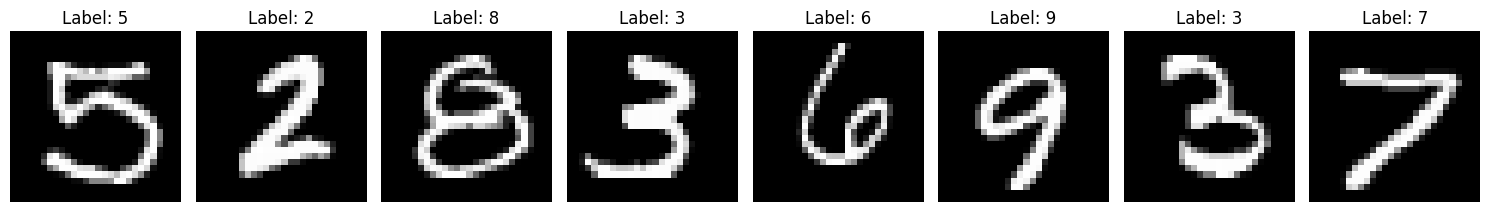

In [11]:
import matplotlib.pyplot as plt


for data, labels in mnist_dataloader:
    fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        img = data[i]
        if img.shape[0] == 1:
            img = img.squeeze(0)  # 去掉单通道维度

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')  # 隐藏坐标轴

    plt.tight_layout()
    plt.show()
    break

In [12]:
class MyClass:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def display_attributes(self):
        print(self.__dict__)

# 创建对象
obj = MyClass(10, 20)

# 查看对象的属性
obj.display_attributes()

{'x': 10, 'y': 20}


In [13]:
class A:
    def __init__(self, x):
        self.x = x

    def __truediv__(self, other):
        return self.x / other.x
    
    def __add__(self, other):
        if isinstance(other, A):
            return self.x + other.x
        else:
            return self.x + other
    
    def __sub__(self, other):
        return self + (-other)
    
